# Jyväskylän kaupungin ostot 2012-2021 <a name="header1"></a>
### Osa 2: Datan analysointi

## Johdanto <a name="introduction"></a>

Tässä tehtävässä tutkitaan Jyväskylän kaupungin ostolaskuja vuosilta 2012-2021. Aineistoa analysoidaan Pythonilla, ja sitä havainnollistetaan erilaisten visualisointien ja taulukoiden avulla. Tiedot on tuotu Excel-tiedostoista, jotka on ladattu 9.5.2023 Jyväskylän kaupungin avoimen datan palvelusta osoitteesta https://data.jyvaskyla.fi/data.php. Tämä muistio (*notebook*) on luotu JupyterLabilla. 

Aineisto on koostettu ja siivottu aiemmassa tiedostossa *'ostolaskut_aineisto.ipynb'*. Nyt on aika tutkia dataa tarkemmin ja katsoa, millaista tietoa siihen sisältyy. Vastauksia halutaan saada seuraaviin kysymyksiin:

- [Kuinka paljon ostoja eri vuosina on kirjattu kaikkiaan](#paragraph1)
- [Mitkä ovat aineiston tilastolliset tunnusluvut](#paragraph2) 
- [Mitkä ovat olleet suurimmat yksittäiset ostot](#paragraph3)
- [Kuinka paljon ostoja kirjattiin eri vuosina vastuualueittain](#paragraph4)
- [Millaisia ostoja sosiaali- ja terveyspalveluissa on tehty](#paragraph5) 
- [Ketkä ovat olleet suurimmat ja pienimmät toimittajat](#paragraph6)


Ensimmäiseksi tuodaan tarvittavat kirjastot, ja ladataan aineisto tiedostosta *'ostolaskut.csv'*:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ostolaskut.csv")

# Katsotaan aineiston viisi ensimmäistä riviä: 
df.head(5)

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1770.00
1,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1100.00
2,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,850.00
3,2021,Konsernihallinto,VALTERI-KOULU,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1215.56
4,2021,Konsernihallinto,VALTERI-KOULU,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1130.68


### Ostot vuosittain <a id="paragraph1"></a> 

Tutkitaan, kuinka paljon Jyväskylän kaupungin kokonaisostot olivat vuositasolla. Python esittää suuret luvut oletusarvoisesti kymmenpotenssimuodossa, esimerkiksi '3.693571e+08', mikä ei tee lukujen vertailusta helppoa. Luettavuuden parantamiseksi ostot on seuraavassa muunnettu miljooniksi euroiksi.

In [3]:
# Kokonaisostot vuosittain (miljoonina euroina):
ostot = (df.groupby('Vuosi')['Nettosumma'].sum()/1000000)
ostot

Vuosi
2012    369.357095
2013    366.606739
2014    355.713543
2015    356.286764
2016    371.658563
2017    384.866733
2018    403.906205
2019    412.807964
2020    408.099289
2021    444.548729
Name: Nettosumma, dtype: float64

Vertailu on helpompaa, kun ostot visualisoidaan. Tehdään vuosiostoista pylväskaavio:

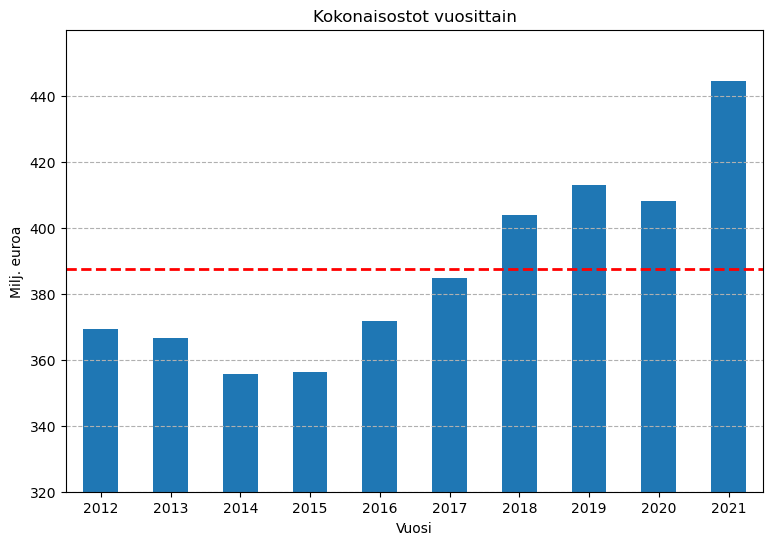

In [4]:
# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Kokonaisostot vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Milj. euroa')

# Asetetaan y-akselin alku- ja loppupiste ja sopivat asteikon välit:
plt.ylim(320, 460)
plt.yticks(np.arange(320, 460, 20))

# Luodaan halutun kokoinen pylväskaavio ostoista:
ostot.plot(kind = 'bar', figsize=(9, 6))

# Asetetaan ruudukko:
plt.grid(axis = 'y', linestyle = '--')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

# Asetetaan keskiarvoviiva:
plt.axhline(y=np.nanmean(ostot), color='red', linestyle='--', linewidth=2)

plt.show()

Kaaviosta havaitaan, että vuosittaiset ostot ovat olleet tarkastelujakson alkupäässä pienempiä kuin loppupäässä. Kuutena ensimmäisenä vuonna ostot ovat jääneet alle tarkastelujakson keskiarvon, kun taas neljänä viimeisenä vuotena ne ovat olleet keskiarvoa suurempia. Suurin poikkeama ostojen keskiarvoon on ollut vuonna 2021.   

[Takaisin alkuun](#header1)

### Kuvaileva tilastoanalyysi <a id="paragraph2"></a> 

Tutkitaan seuraavaksi tilastollisten tunnuslukujen avulla, mitä euromääräisistä netto-ostoista saadaan selville *describe*-metodin avulla:

In [5]:
stats = df['Nettosumma'].describe()
stats

count    1.953887e+06
mean     1.982639e+03
std      7.722789e+04
min     -9.078436e+06
25%      2.211000e+01
50%      9.416000e+01
75%      3.864300e+02
max      1.386253e+07
Name: Nettosumma, dtype: float64

Yllä olevasta huomataan, että pienin osto on negatiivinen, mikä tarkoittaa, että aineistossa on mukana hyvityslaskuja. Jatketaan tarkastelua seuraavaksi vuositasolla ja vain varsinaisilla ostoilla, eli jätetään nämä "negatiiviset ostot" huomioimatta. Tehdään tätä varten uusi datakehikko *'df1'*:

In [6]:
# Tehdään dataframe 'df1', josta on puhdistettu hyvityslaskut pois:
df1 = df[df['Nettosumma'] > 0]
    
# Ryhmitellään nettosummat vuosittain, ja kootaan halutut tunnusluvut uuteen dataframeen 'tilastot':
tilastot = df1.groupby('Vuosi', as_index=False).agg(
    {'Nettosumma': ['count', 'sum', 'mean', 'std', 'min', 'max']
    })

# Vaihdetaan sarakkeiden nimet:
tilastot.columns = ['Vuosi', 'Ostojen lukumäärä', 'Ostot yhteensä (milj. euroa)', 'Keskimääräinen osto', 'Keskihajonta', 'Minimiosto', 'Maksimiosto (milj. euroa)']

# Muotoillaan sarakkeita luettavuuden parantamiseksi. Valitaan ensimmäiset muotoiltavat sarakkeet:
muot_sarakkeet1 = ['Ostot yhteensä (milj. euroa)', 'Maksimiosto (milj. euroa)']

# Muotoillaan näitä muuttamalla luvut miljooniksi euroiksi, ja pyöristämällä yhteen desimaaliin:
tilastot[muot_sarakkeet1] = tilastot[muot_sarakkeet1].applymap(lambda x: '{:.1f}'.format(x/1000000)).astype(float)

# Valitaan seuraavaksi muotoiltavat sarakkeet:
muot_sarakkeet2 = ['Keskimääräinen osto', 'Keskihajonta', 'Minimiosto']

# Muotoillaan näiden sarakkeiden luvut kahteen desimaaliin:
tilastot[muot_sarakkeet2] = tilastot[muot_sarakkeet2].applymap(lambda x: '{:.2f}'.format(x)).astype(float)

tilastot

#tilastot[['Vuosi', 'Keskimääräinen osto']].plot(x='Vuosi', kind='bar')

,Vuosi,Ostojen lukumäärä,Ostot yhteensä (milj. euroa),Keskimääräinen osto,Keskihajonta,Minimiosto,Maksimiosto (milj. euroa)
0,2012,203323,372.8,1833.64,46106.88,0.01,5.5
1,2013,205780,378.0,1836.99,53222.69,0.01,7.7
2,2014,192524,357.2,1855.50,52262.13,0.01,6.2
3,2015,198254,357.9,1805.50,53520.47,0.01,5.5
4,2016,211223,400.2,1894.71,61202.23,0.01,8.9
5,2017,211206,388.2,1838.07,63270.56,0.01,11.1
6,2018,224080,406.5,1814.08,68337.89,0.01,10.2
7,2019,137522,413.2,3004.74,126778.49,0.01,13.6
8,2020,125964,408.8,3245.26,131139.29,0.01,13.9
9,2021,219272,445.0,2029.51,100838.35,0.00,13.5


Tutkitaan ostoja vielä visuaalisesti. Katostaan, kuinka suuria keskimääräiset vuosiostot ovat olleet, ja kuinka paljon ostotapahtumia on tehty vuosittain:

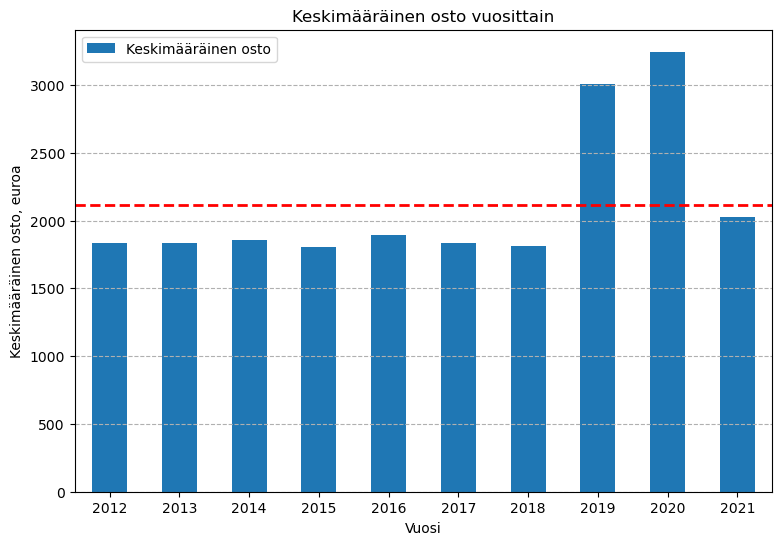

In [7]:
# Luodaan pylväskaavio:
tilastot.plot(kind = 'bar', x = 'Vuosi', y = 'Keskimääräinen osto', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Keskimääräinen osto vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Keskimääräinen osto, euroa')

# Asetetaan ruudukko:
plt.grid(axis = 'y', linestyle = '--')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

# Asetetaan keskiarvoviiva:
plt.axhline(y=np.nanmean(tilastot['Keskimääräinen osto']), color='red', linestyle='--', linewidth=2)

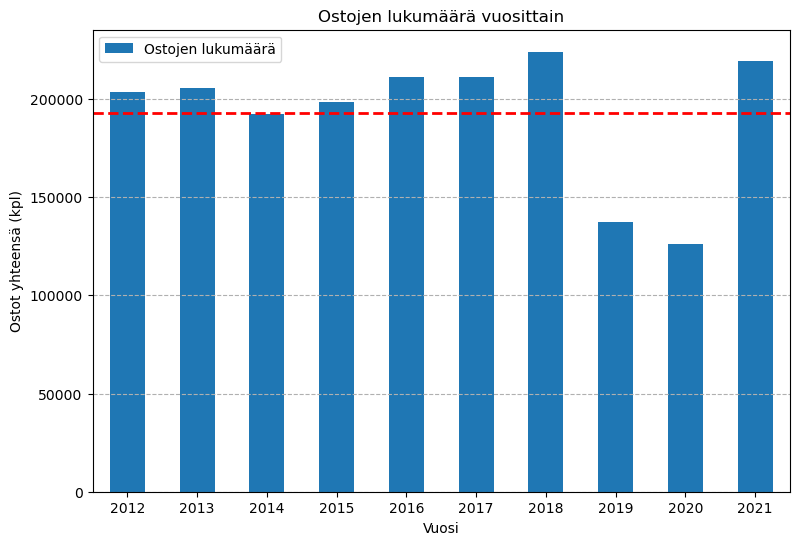

In [8]:
# Luodaan pylväskaavio:
tilastot.plot(kind = 'bar', x = 'Vuosi', y ='Ostojen lukumäärä', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Ostojen lukumäärä vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Ostot yhteensä (kpl)')

# Asetetaan ruudukko:
plt.grid(axis = 'y', linestyle = '--')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

# Asetetaan keskiarvoviiva:
plt.axhline(y=np.nanmean(tilastot['Ostojen lukumäärä']), color='red', linestyle='--', linewidth=2)

Tuloksista havaitaan, että keskimääräiset ostot ovat vaihdelleet vuosittain suuresti. Pienimmillään keskimääräiset vuosiostot olivat 1805,50 euroa (2015), ja suurimmillaan ne ovat olleet 3245,26 euroa (2020). Minimiostoissa sen sijaan ei ollut käytännössä eroa, vaan pienin ostos oli noin nolla euroa joka vuonna. Maksimiostoissa vaihtelu sen sijaan oli suurta. Pienimmillään yksittäinen maksimiosto oli vuosina 2012 ja 2015 (5,5 miljooonaa euroa), kun taas suurimmillaan maksimiosto oli vuonna 2020 (13,9 miljoonaa euroa). Ostojen yhteenlaskettu summa on ollut tarkastelujakson loppupuolella alkupuolta suurempi, kuten myös keskimääräiset ostot ja maksimiostot. 

Vuosittaisten ostotapahtumien määrä on pysynyt noin kahdensadan tuhannen kappaleen tasolla muulloin, paitsi vuosina 2019 ja 2020, jolloin ostoja on tehty merkittävästi muita vuosia vähemmän. Toisaalta, keskimääräinen osto on ollut vuosina 2019 ja 2020 merkittävästi muita vuosia korkeampi, eli näinä vuosina on ostettu vähemmän, mutta kalliimpia yksittäisiä ostoja. 

Keskihajonta kertoo, kuinka paljon havainnot poikkeavat keskiarvosta. Keskihajonta kasvaa tarkastelujakson kolmena viimeisenä vuotena reilusti, mikä antaa ymmärtää, että osa ostoista poikkeaa suuresti keskiarvo-ostoista. Tutkitaan tätä seuraavaksi lisää. Netto-ostojen jakaumaa voidaan kuvata visuaalisesti esimerkiksi laatikko-janakuviolla, joten tehdään seuraavaksi sellainen.

<AxesSubplot:title={'center':'Nettosumma'}, xlabel='Vuosi'>

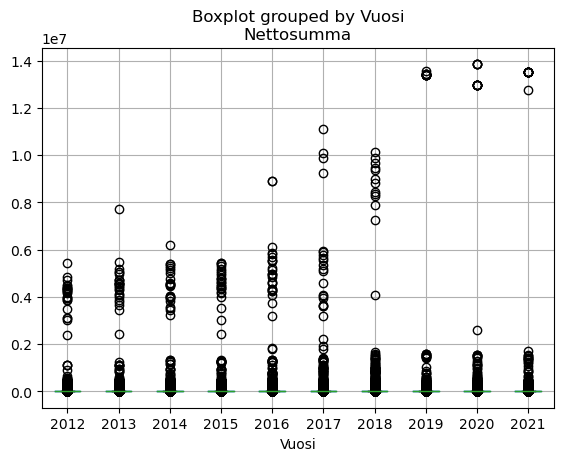

In [32]:
df1.boxplot(by = 'Vuosi', column = ['Nettosumma'])

Yllä oleva kuvio poikkeaa melkoisesti perinteisestä [laatikko-janakuvion (boxplot)](https://en.wikipedia.org/wiki/Box_plot) muodosta, mistä voidaan päätellä, että vuosittaiset ostot eivät ole tasaisesti jakautuneet. Kaavion laatikot sisältävät puolet vuoden ostoista, mutta tässä laatikoita ei edes erota, sillä ne näyttävät osuvan niin lähelle nollaa. Kuviosta kuitenkin havaitaan, että joka vuonna on ollut ostoja, jotka ovat varsin kaukana suurimmasta osasta ostoja. Erityisesti vuosina 2019, 2020 ja 2021 valtaosa ostoista on kasautunut melko nätisti lähelle toisiaan, mutta sitten jokunen suuri osto on todella kaukana näistä kaikista muista.   

Katsotaan seuraavaksi, mitkä ovat olleet suurimmat yksittäiset ostot.

[Takaisin alkuun](#header1)

### Suurimmat ostot <a id="paragraph3"></a>   

Tutkitaan, mitkä ovat olleet kunkin vuoden viisi suurinta ostoa. 

In [10]:
# Tehdään uusi dataframe, johon ostot järjestetään laskevaan järjestykseen:
ostot_jarjest = df.sort_values(['Vuosi', 'Nettosumma'], ascending = [True, False])

# Ryhmitellään ostot vuosittain:
ostot_ryhmitelty = ostot_jarjest.groupby('Vuosi')

# Luodaan tyhjä dataframe 'isoimmat_ostot':
isoimmat_ostot = pd.DataFrame()

# Käydään läpi vuosiostoksia ryhminä (ryhma = ostokset vuoden aikana)
# Tallennetaan vuoden viisi suurinta ostoa ('isoimmat')
# Liitetään dataframeen 'isoimmat_ostot' kyseisen vuoden isoimmat ostot ('isoimmat'):

for vuosi, ryhma in ostot_ryhmitelty:
    isoimmat = ryhma.head(5)
    isoimmat_ostot = pd.concat([isoimmat_ostot, isoimmat])
    
# Muutetaan nettosummat miljooniksi euroiksi, pyöristetään kahden desimaalin tarkkuuteen:
isoimmat_ostot['Nettosumma'] = (isoimmat_ostot['Nettosumma'] / 1000000).round(2)

# Vaihdetaan sarakkeen 'Nettosumma' nimi:
isoimmat_ostot2 = isoimmat_ostot.rename(columns = {'Nettosumma': 'Nettosumma, milj. euroa'})

isoimmat_ostot2

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,"Nettosumma, milj. euroa"
1854581,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.45
1854557,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.86
1854208,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.70
1854276,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.51
1854082,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.48
1645990,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,7.74
1646291,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.47
1645981,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.19
1645912,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.08
1646388,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.06


Havainnoitetaan saatuja tuloksia visuaalisesti. Tehdään suurimmista vuosiostoista hajontakaavio.

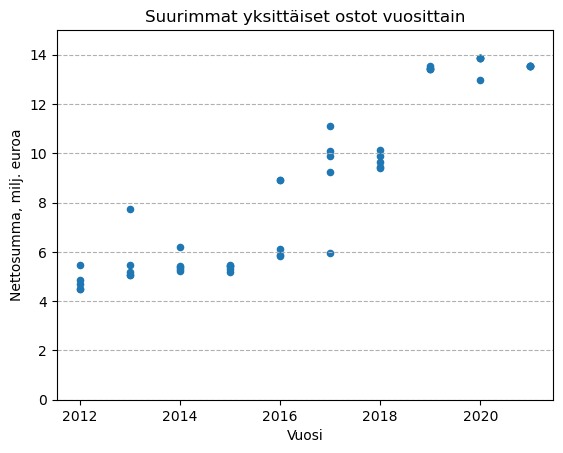

In [11]:
# Tehdään hajontakaavio:
isoimmat_ostot2.plot.scatter(x = 'Vuosi', y = 'Nettosumma, milj. euroa')

# Asetetaan y-akselin asteikko:
plt.ylim([0, 15])

# Lisätään viivat:
plt.grid(axis = 'y', linestyle = '--')

# Lisätään otsikko:
plt.title("Suurimmat yksittäiset ostot vuosittain")

plt.show()

Tuloksista havaitaan, että suurimmat ostot joka vuonna on kirjattu sosiaali- ja terveyspalvelujen vastuualueelle, mutta näiden suuruus on vaihdellut reilusti vuosittain. Suurimmat yksittäiset ostot ovat olleet vuosina 2019, 2020 ja 2021, pienimmät taas vuosina 2012 ja 2015.    

Tutkitaan seuraavaksi tarkemmin, kuinka ostot jakaantuvat eri vastuualueiden kesken. 

[Takaisin alkuun](#header1)

### Ostot vastuualueittain <a id="paragraph4"></a>  

In [12]:
# Lasketaan nettosummat yhteen vastuualueittain, ja muunnetaan miljooniksi euroiksi:  
ostot_va = pd.DataFrame(df.groupby('Vastuualue')['Nettosumma'].sum()/1000000)

# Lajitellaan tulokset laskevaan järjestykseen: 
ostot_va2 = (ostot_va.sort_values(by = 'Nettosumma', ascending = False))

# Vaihdetaan sarakkeen nimi: 
ostot_va2.columns = ['Kokonaisostot yhteensä, milj. euroa']

# Pyöristetään tulokset yhden desimaalin tarkkuuteen: 
ostot_va3 = ostot_va2.round(1)

# Tulostetaan saatu datakehikko:
ostot_va3

,"Kokonaisostot yhteensä, milj. euroa"
Vastuualue,
Sosiaali- ja terveyspalvelut,2176.1
Jyväskylän Tilapalvelu,571.5
Kaupunkirakennepalvelut,480.1
Konsernihallinto,162.2
Kasvun ja oppimisen palvelut,130.3
Kylän Kattaus,84.1
Altek Aluetekniikka,75.6
Liikuntapalvelut,63.7
K-S Pelastuslaitos,60.6


In [13]:
# Tehdään datakehikko 'vastuual_vuosi', jossa ostot ryhmitellään vuosien ja vastuualueitten mukaan (milj. euroa):
vastuual_vuosi = (df['Nettosumma'].groupby([df['Vuosi'], df['Vastuualue']]).sum())/1000000

# Tehdään uusi datakehikko 'vastuual_vuosi2', jossa 2-tasoinen indeksi muotoillaan riviksi ja sarakkeiksi: 
vastuual_vuosi2 = vastuual_vuosi.unstack()

# Kerätään aiemmasta datakehikosta 'va_3' vastuualueet listaan:
cols = ostot_va3.index

# Vaihdetaan vastuualuelistan avulla datakehikon 'vastuual_vuosi_us' sarakkeiden järjestystä:
vastuual_vuosi3 = vastuual_vuosi2[cols]

vastuual_vuosi3

Vastuualue,Sosiaali- ja terveyspalvelut,Jyväskylän Tilapalvelu,Kaupunkirakennepalvelut,Konsernihallinto,Kasvun ja oppimisen palvelut,Kylän Kattaus,Altek Aluetekniikka,Liikuntapalvelut,K-S Pelastuslaitos,Kulttuuripalvelut,Työterveys Aalto,Talouskeskus,Perusturva,Kulttuuri- ja liikuntapalvelut,Konsernihallinto / Kankaan alue
Vuosi,,,,,,,,,,,,,,,
2012,195.257092,72.752650,37.292812,13.712814,13.422582,6.656425,9.864133,5.164644,6.504872,4.538122,2.021601,2.169346,NaN,NaN,NaN
2013,214.892883,50.767856,36.139738,13.965168,14.490285,6.217150,10.499184,6.317418,5.759586,3.826071,1.907027,1.824375,NaN,NaN,NaN
2014,218.340867,45.985525,37.569190,10.921145,11.135362,5.975258,8.208549,5.607276,5.137988,3.877346,1.679633,1.275404,NaN,NaN,NaN
2015,206.425180,43.963856,42.237236,17.603906,12.234088,6.116834,8.770043,5.635193,5.871499,4.380114,1.846249,1.202566,NaN,NaN,NaN
2016,212.922520,46.261979,47.647577,18.093412,10.361734,8.680994,8.533941,5.725863,5.771458,4.314069,2.122351,1.222664,NaN,NaN,NaN
2017,219.165470,53.958871,48.097085,15.401737,11.904256,8.914585,8.012135,6.515230,5.452838,4.249275,1.954162,1.241088,NaN,NaN,NaN
2018,216.079596,68.879309,51.379705,15.129169,12.824510,9.903418,9.763503,5.827697,6.165423,4.566475,1.734879,1.352060,NaN,NaN,0.300462
2019,218.280380,65.150000,50.752620,18.497821,16.474150,10.960836,11.889857,7.748127,6.757217,6.296958,NaN,NaN,NaN,NaN,NaN
2020,225.488722,59.786605,61.891632,17.856875,12.596141,10.708071,0.014696,7.800575,6.669298,4.435386,NaN,NaN,0.585787,0.265501,NaN


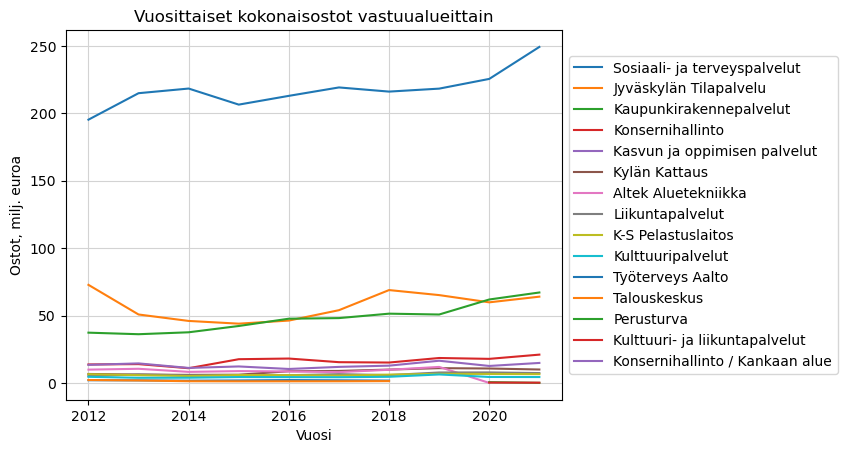

In [14]:
# Tehdään datakehikosta 'vastuual_vuosi3' kuvaaja:
vastuual_vuosi3.plot(title = 'Vuosittaiset kokonaisostot vastuualueittain')

# Sijoitetaan selitelaatikko kuvion ulkopuolelle:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Lisätään akselien otsikot:
plt.ylabel('Ostot, milj. euroa')
plt.xlabel('Vuosi')

# Lisätään ruudukko: 
plt.grid(axis = 'both', color = "lightgray")

plt.show()

Taulukosta ja kuvaajasta havaitaan, että vuosittaisia kokonaisotoja on kirjattu reilusti kaikkein eniten sosiaali- ja terveyspalvelujen vastuualueelle, ja niiden vuosittaiset kokonaisostot ovat tarkastelujakson loppua kohden kasvaneet. Seuraavaksi eniten ostoja on kirjattu Jyväskylän Tilapalvelulle, jonka ostojen määrä on vaihdellut jonkin verran vuosittain. Kolmantena ostoissa on kaupunkirakennepalvelut, joiden ostojen määrä on kasvanut tarkastelujakson aikana selvästi. Muiden vastuualueiden ostot ovat olleet pienempiä, ja niiden vaihtelua on tästä kuvaajasta hankala tarkasti arvioida. 

[Takaisin alkuun](#header1)

### Sosiaali- ja terveyspalvelujen ostot <a id="paragraph5"></a>   

Aiemmin havaittiin, että kaikkein suurimmat ostot kuuluvat sosiaali- ja terveyspalveluiden vastuualueelle. Tutkitaan seuraavaksi tarkemmin, millaisia ostoja sote-vastuualueelle on tarkastelujaksolla kirjattu.  Katsotaan ensimmäiseksi, minkä nimisille tiliryhmille ostoja on tehty eri vuosina.

In [23]:
# Tehdään datakehikko 'sote' sosiaali- ja terveyspalveluje ostoista:
sote = df.loc[df['Vastuualue'] == 'Sosiaali- ja terveyspalvelut', ['Vuosi', 'Tiliryhmä', 'Tilin nimi', \
                                                                   'Toimittajan nimi', 'Nettosumma']]

# Ryhmitellään sote-palveluiden ostot vuosittain ja tiliryhmittäin, ja muutetaan miljooniksi euroiksi:
sote1 = pd.DataFrame((sote['Nettosumma'].groupby([sote['Vuosi'], sote['Tiliryhmä']]).sum())/1000000).round(2).sort_values(['Vuosi', 'Nettosumma'], ascending = [True, False])

# Ryhmitellään ostot vuosittain
# Koska kaikille tiliryhmille ei ole kirjattu ostoja jokaisena vuonna, muutetaan NaN-arvot nolliksi
sote1.unstack().fillna(0)

Nettosumma                          \
Tiliryhmä Aineet, tarvikkeet ja tavarat Asiakaspalvelujen ostot   
Vuosi                                                             
2012                               0.02                    0.00   
2013                               0.02                    0.00   
2014                               0.00                    0.00   
2015                               0.00                    0.00   
2016                               0.00                    0.00   
2017                               0.00                    0.00   
2018                               0.00                    0.00   
2019                               0.00                    0.00   
2020                               0.00                  189.30   
2021                               0.00                  205.55   

                                                                             \
Tiliryhmä Henkilöstökorv. ja muut henk.menojen korj.erät Muut toimintakulut   
Vuosi                                                                         
2012                                                 0.0               0.00   
2013                                                 0.0               0.01   
2014                                                 0.0               0.01   
2015                                                 0.0               0.31   
2016                                                 0.0               0.18   
2017                                                 0.0               0.21   
2018                                                 0.0               0.36   
2019                                                 0.0               1.01   
2020                                                 0.0               0.00   
2021                                                 0.0               0.00   

                                                      \
Tiliryhmä Palvelujen ostot Sisäiset palvelujen ostot   
Vuosi                                                  
2012                   0.0                       0.0   
2013                   0.0                       0.0   
2014                   0.0                       0.0   
2015                   0.0                       0.0   
2016                   0.0                       0.0   
2017                   0.0                       0.0   
2018                   0.0                       0.0   
2019                   0.0                       0.0   
2020                   0.0                       0.0   
2021                   0.0                       0.0   

                                                                              \
Tiliryhmä Ulkoiset aineet, tarvikkeet ja tavarat Ulkoiset muut toimintakulut   
Vuosi                                                                          
2012                                        6.86                        0.00   
2013                                        6.46                        0.00   
2014                                        7.00                        0.00   
2015                                        6.79                        0.00   
2016                                        7.71                        0.00   
2017                                        7.61                        0.00   
2018                                        7.23                        0.00   
2019                                        7.67                        0.00   
2020                                        7.39                        0.08   
2021                                        8.97                        0.12   

                                                           \
Tiliryhmä Ulkoiset vuokrakulut Ulkoisten palvelujen ostot   
Vuosi                                                       
2012                      0.00                     186.27   
2013                      0.00                     207.24   
2014                      0.00                     209

Vaikka yllä oleva taulukko on selkeä, siitä on hieman hankalaa tulkita, mille tiliryhmälle ostoja on kirjattu minkäkin verran. Tutkitaan tätä seuraavaksi pylväskaavion avulla:

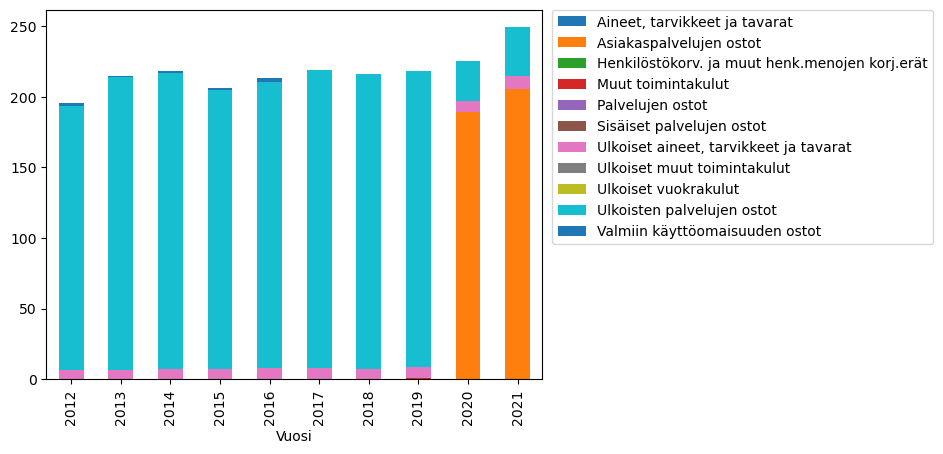

In [24]:
# Tehdään pylväskaavio vuosittaisten sote-ostojen jakautumisesta tiliryhmittäin:
sote1.Nettosumma.unstack().plot(kind='bar', stacked=True)

# Asetetaan selitelaatikko kuvion viereen:
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Kaaviosta nähdään taulukkoa selkeämmin, että vuosina 2012-2019 sosiaali- ja terveyspalveluiden ostot kirjattiin liki pelkästään ulkoisiin palveluihin sekä ulkoisiin aineisiin, tarvikkeisiin ja tavaroihin. Vuosina 2020 ja 2021 seen sijaan valtaosa ostoista oli tehty asiakaspalvelujen tiliryhmälle, ja ulkoisten palvelujen ostot olivat merkittävästi aikaisempia vuosia pienemmät.  

Tutkitaan vielä histogrammin avulla, miten sote-palveluiden ostojen summa jakaantuu:

<AxesSubplot:ylabel='Frequency'>

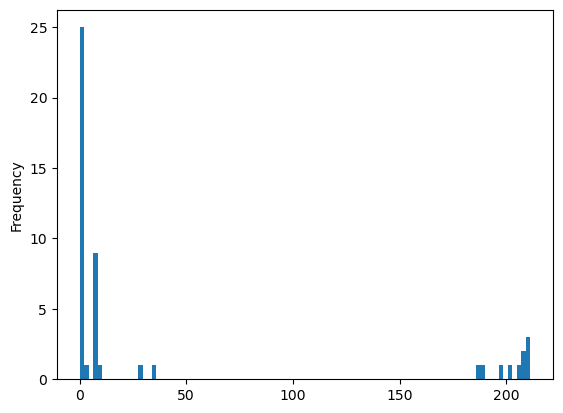

In [37]:
sote1.Nettosumma.plot.hist(bins=100)

Yllä olevasta nähdään, että valtaosa sote-palveluiden ostoista on ollut melko pieniä, mutta toisaalta myös jokunen todella iso, noin 200 miljoonan euron arvoinen osto, on niin ikään tehty. Näiden ääripäiden väliltä ostoja ei kuitenkaan näyttäisi juuri olevan. 

[Takaisin alkuun](#header1)

### Suurimmat ja pienimmät toimittajat <a id="paragraph6"></a> 

Selvitetään lopuksi, mitkä tahot ovat oolleet suurimpia ja pienimpiä ostojen toimittajia. Tutkitaan ensiksi, mitkä ovat olleet kymmenen suurinta toimittajaa nettosumman perusteella.

In [ ]:
# Ryhmitellään nettosummat toimittajien mukaan, ja muunnetaan summat miljooniksi euroiksi: 
toimittajat = pd.DataFrame(df.groupby('Toimittajan nimi')['Nettosumma'].sum()/1000000).round(2)

# Lajitellaan toimittajat laskevaan järjestykseen nettosumman perusteella:
toimittajat1 = pd.DataFrame(toimittajat.sort_values('Nettosumma', ascending = False))

# Vaihdetaan sarakkeen nimi: 
toimittajat1.columns = ['Nettosumma yhteensä, milj. euroa']

# Katsotaan kymmenen suurinta toimittajaa:
toimittajat2 = pd.DataFrame(toimittajat1.head(10))

toimittajat2

In [ ]:
# Luodaan pylväskaavio vaakatasossa:
toimittajat2.sort_values(by = 'Nettosumma yhteensä, milj. euroa').plot(kind = 'barh', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Suurimmat toimittajat')
plt.xlabel('Nettosumma, milj. euroa')

# Asetetaan ruudukko:
plt.grid(axis = 'x', linestyle = '--')

plt.show()

Tuloksista huomataan, että valtaosan Jyväskylän kaupungin ostoista on toimittanut Keski-Suomen sairaanhoitopiirin Ky (yhteensä liki 1,7 miljardia euroa). Seuraavaksi suurimmat toimittajat ovat olleet Jyväskylän Liikenne Oy (125 miljoonaa euroa), Total Kiinteistöpalvelut Oy (49 miljoonaa euroa) sekä Jyväskyän Energia Oy (47 miljoonaa euroa).   

Tutkitaan seuvaavaksi, ketkä ovat toimittaneet Jyväskylän kaupungin pienimmät ostot. Käytetään tässä [kuvailevaa tilastoanalyysiä](#subparagraph6) varten luotua datakehikkoa *'df1'*, josta oli siivottu hyvityslaskut pois. Tässä siis huomioidaan vain yli nollan euron maksaneet ostot. Tutkitaan samalla, mille vastuualueelle ja tiliryhmälle kysyinen osto on tehty.

In [ ]:
# Ryhmitellään nettosummat toimittajien mukaan: 
pientoimittajat = pd.DataFrame(df1.groupby('Toimittajan nimi')['Nettosumma'].sum()).round(2)

# Lajitellaan toimittajat nousevaan järjestykseen nettosumman perusteella:
pientoimittajat1 = pd.DataFrame(pientoimittajat.sort_values('Nettosumma', ascending = True))

# Katsotaan kymmenen pienintä toimittajaa:
pientoimittajat2 = pd.DataFrame(pientoimittajat1.head(10))

pientoimittajat2

Jos suurimmalle toimittajalle oli kirjattu yhteensä liki kahden miljardin euron ostot, pienimmillä toimittajilla ostot ovat olleet alle yhden euron luokkaa. Nämä ovat kuitenkin todennäköisesti olleet pieniä, yksittäisiä ostoja. 

Tutkitaan lopuksi vielä mielenkiinnon vuoksi, ketkä ovat olleet pienimmät kymmenen toimittajaa, joilta on ostettu vähintään viisi kertaa tietylle vastuualueelle, ja kuinka paljon näille on yhteensä maksettu nettona:

In [38]:
# Ryhmitellään ostot toimittajien ja vastuualueiden mukaan, ja aggregoidaan nettosummat määrän ja summan perusteella:
pientoimittajat_ryh = df1.groupby(['Toimittajan nimi', 'Vastuualue']).agg({'Nettosumma': ['count', 'sum']}, as_type = ['int', 'float'])

# Nimetään sarakkeet uudelleen:
pientoimittajat_ryh.columns = ['Ostojen määrä yhteensä', 'Nettosumma yhteensä']

# Järjestetään rivit nousevaan järjestykseen ostojen määrän perusteella:
pientoimittajat_ryh2 = pientoimittajat_ryh.sort_values('Ostojen määrä yhteensä', ascending = True)

# Huomioidaan toimittajat, joilta on ostettu vähintään 5 kertaa:
pientoimittajat_ryh3 = pientoimittajat_ryh2[pientoimittajat_ryh2['Ostojen määrä yhteensä'] >= 5]

# Järjestellään rivit nousevaan järjestykseen ostojen määrän ja nettosumman perusteella, 
# otetaan mukaan 10 ensimmäistä riviä:
pientoimittajat_ryh4 = pientoimittajat_ryh3.sort_values(['Ostojen määrä yhteensä', 'Nettosumma yhteensä'], ascending = [True, True]).head(10)

pientoimittajat_ryh4

,,Ostojen määrä yhteensä,Nettosumma yhteensä
Toimittajan nimi,Vastuualue,,
JUVAS PARKKI OY Jyvaskyla kat,K-S Pelastuslaitos,5,6.72
Finavia Oy Vantaa,Kasvun ja oppimisen palvelut,5,8.81
PYSAKOINTIMAKSUT HELSI HELSINKI,Konsernihallinto,5,10.40
0319180 Presso Seppala Jyvaskyla,Kasvun ja oppimisen palvelut,5,12.70
Juha T Kuukkanen Ky JYVASKYLA,Kasvun ja oppimisen palvelut,5,14.70
Humana Parnu mnt Tallinn,Kulttuuripalvelut,5,15.82
Presso Prisma Sepp l JYV SKYL,Kasvun ja oppimisen palvelut,5,16.06
Jyvas Parkki Oy P Sairaala Jy,Konsernihallinto,5,16.60
SM Kahvila Konditoriat 41400 LIEVEST,Kasvun ja oppimisen palvelut,5,17.19


Pienimmät viisi kertaa yhdelle vastuualueelle toimittaneet tahot ovat pääsääntöisesti mitä ilmeisimmin pysäköintialan yrityksiä sekä kahviloita. Nettosummat yhteensä ovat jääneet viiden oston osalta alle 20 euroon näille toimittajille.

[Takaisin alkuun](#header1)